In [15]:
## Importing the libraries

## A random porfolio of a customer is analyzed for upto 90

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
stocks = ['JNJ', 'NVO', 'MSFT', 'AMZN', 'TSLA', 'INTC', 'AMD']
endDate = datetime.now().date()
startDate = endDate - timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

[*********************100%***********************]  7 of 7 completed


In [9]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

### we will be assuming daily returns are distributed by a Multivariate Normal Distribution Rt∼MVN(μ,∑)
### Cholesky Decomposition is used to determine Lower Triangular Matrix L∈LL′=∑
### Rt=μ+LZt
### Zt∼N(0,I)
### Where Zt are the samples from a normal distribution (Ι represents the Identity matrix).


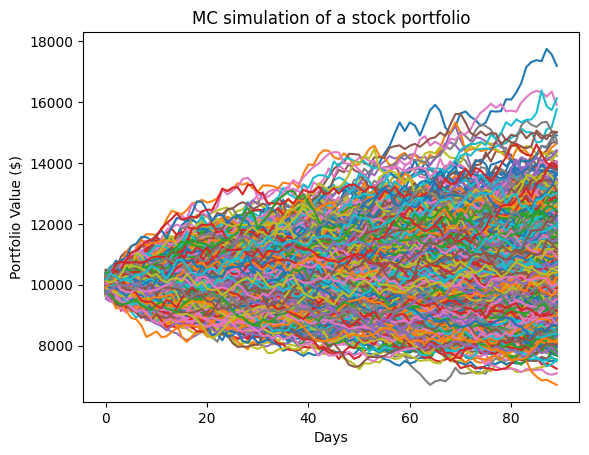

In [13]:
# Monte Carlo Method
mc_sims = 1000 # number of simulations
T = 90 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()